<a href="https://colab.research.google.com/github/Chirag314/EDA/blob/main/Practise_data_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns
# Load inbuilt dataset 'tips'
tips=sns.load_dataset('tips')
type(tips)

pandas.core.frame.DataFrame

In [ ]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [ ]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


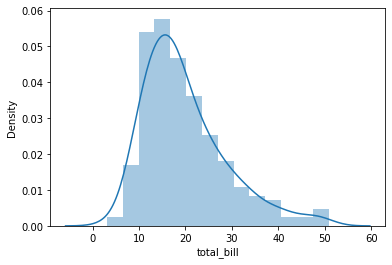

In [ ]:
# lets check how total bill is distributed
sns.distplot(tips['total_bill'])
#sns.distplot(tips['tip']) # Dislplay tip also on same plot

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


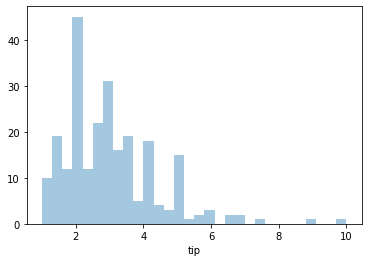

In [ ]:
# Always select balanced number for bin size. Too big number will result in a plot of every single instance
sns.distplot(tips['tip'],kde=False,bins=30)

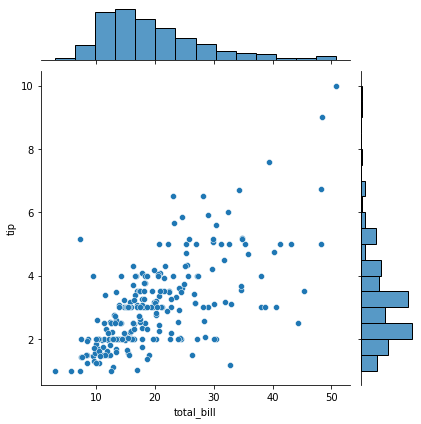

In [ ]:
# Joint plot for comparison.
sns.jointplot(x='total_bill',y='tip',data=tips)# kind=scatter' by default


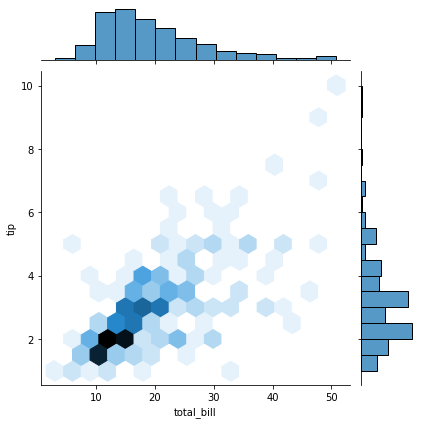

In [ ]:
# HExagon plot .. Darker the color, more points in the hexagon
sns.jointplot(x='total_bill',y='tip',data=tips,kind='hex')

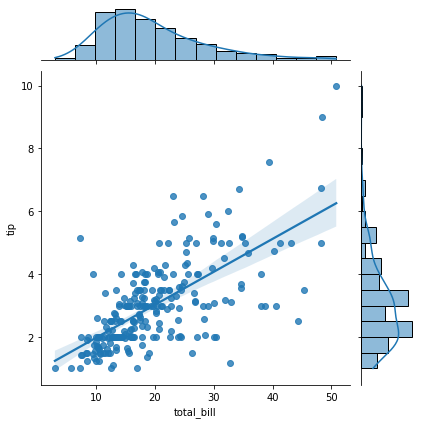

In [ ]:
# Regression plot
sns.jointplot(x='total_bill',y='tip',data=tips,kind='reg')

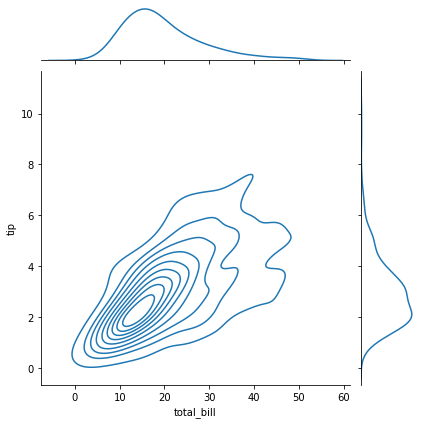

In [ ]:
#kde plot
sns.jointplot(x='total_bill',y='tip',data=tips,kind='kde')

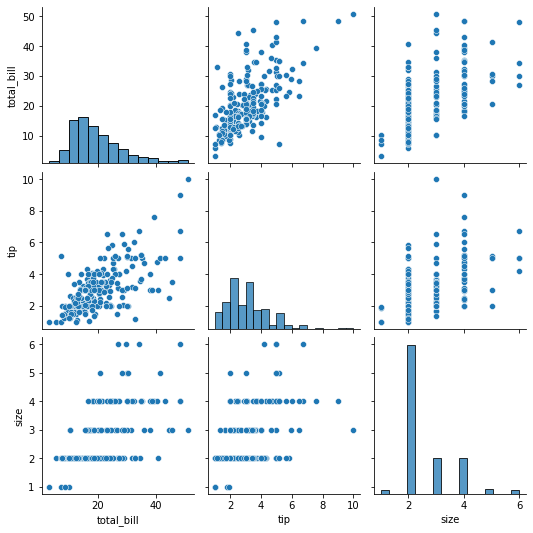

In [ ]:
## Pairplot :- Multiple paiwise bivariate distribution in a dataset togeter on a single canvass.Only for numerical columns
sns.pairplot(tips)

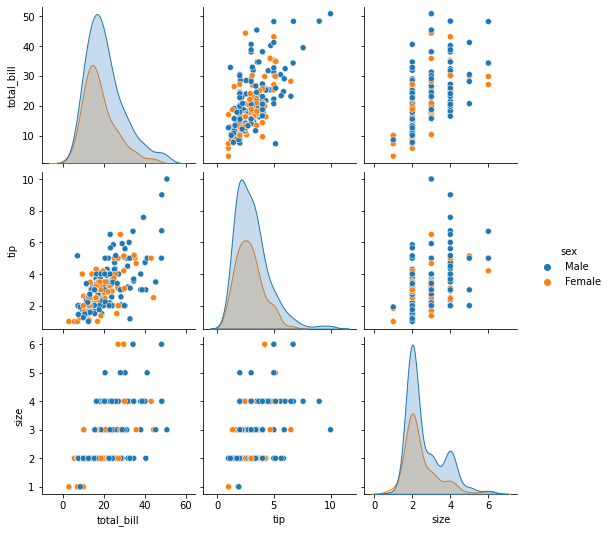

In [ ]:
# Adding a categorical column as a hue in pairwise

sns.pairplot(tips,hue='sex')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


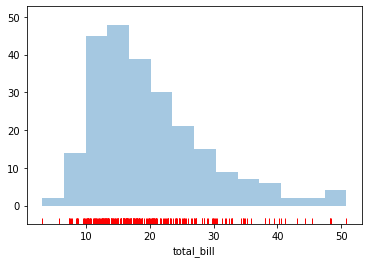

In [ ]:
# Rugplot. just plot sticks on an axis . They are building blocks of kde plots
sns.rugplot(tips['total_bill'],color='r')
sns.distplot(tips['total_bill'],kde=False)

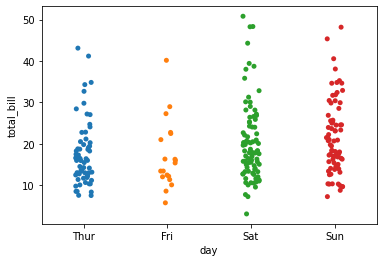

In [ ]:
# Categorical plots

#scatterplot
sns.stripplot(x='day',y='total_bill',data=tips)

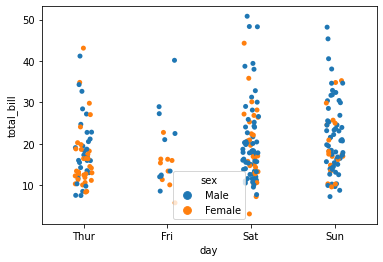

In [ ]:
sns.stripplot(x='day',y='total_bill',data=tips,jitter=True,hue='sex')

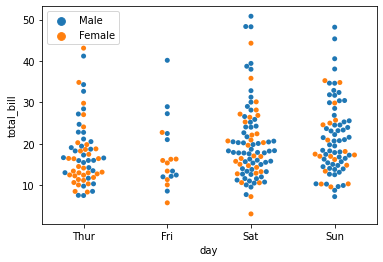

In [ ]:
# Swarmplot
ax=sns.swarmplot(x='day',y='total_bill',data=tips,hue='sex')
ax.legend(loc=2)

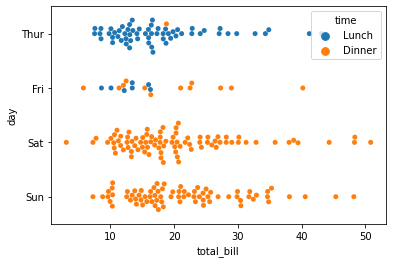

In [ ]:
#put categorical variable on vertical axis
sns.swarmplot(x='total_bill',y='day',hue='time',data=tips)
# From this we can see that almost all customer go for lunch on Thursday and dinner on weekends. They didnt go much on Fridays.

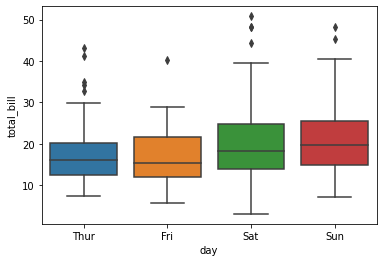

In [ ]:
#Boxplot to find out distribution of categorical data
sns.boxplot(x='day',y='total_bill',data=tips)

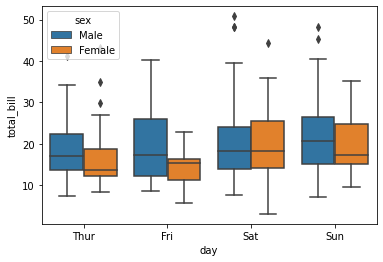

In [ ]:
# Check with respect to sex
sns.boxplot(x='day',y='total_bill',data=tips,hue='sex')

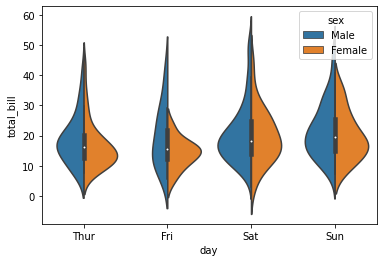

In [ ]:
# Check violin plot
sns.violinplot(x='day',y='total_bill',data=tips,hue='sex',split=True)

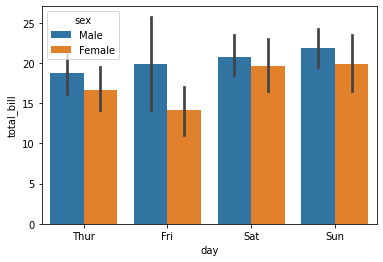

In [ ]:
# Categorical estimation plots
# barplots
sns.barplot(x='day',y='total_bill',hue='sex',data=tips)

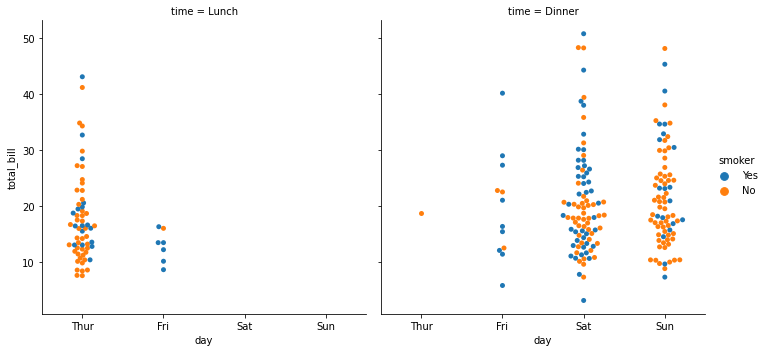

In [ ]:
# Catplot

sns.catplot(x='day',y='total_bill',hue='smoker',col='time',data=tips,kind='swarm')

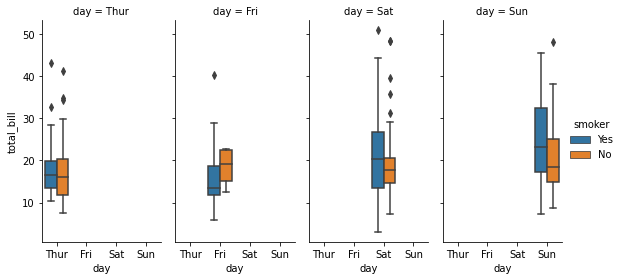

In [ ]:
# try kind=box and col=day

sns.catplot(x='day',y='total_bill',hue='smoker',col='day',data=tips,kind='box',height=4,aspect=0.5)

In [ ]:
# World choropleth map
# Use world GDP data and plot on map
import pandas as pd
gdp=pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_world_gdp_with_codes.csv')
gdp.head()

,COUNTRY,GDP (BILLIONS),CODE
0,Afghanistan,21.71,AFG
1,Albania,13.40,ALB
2,Algeria,227.80,DZA
3,American Samoa,0.75,ASM
4,Andorra,4.80,AND


In [ ]:
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs
from plotly.offline import init_notebook_mode
from plotly.offline import plot,iplot
# Data dictionary
data=dict(type='choropleth',
          locations=gdp['CODE'],
          z=gdp['GDP (BILLIONS)'],
          text=gdp['COUNTRY'],
          colorbar={'title':'GDP Billions US'})

#layout
layout = dict(
    title= '2014 Global GDP',
    geo=dict(
    showframe=False,
    projection = {'type':'mercator'}
    )
)

# Finally plot
choromap = go.Figure(data=[data], layout=layout)
iplot(choromap)

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session